## Exercise 


For this exercise, you will be working with the [House Price Dataset](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/code).

Please grab the train.csv file from Kaggle and explore this dataset. You need to perform explroatory data analysis and see if there is any correlation between the variables and analyze the distribution of the dataset. The question is open-ended and basically you're asked to perform EDA. 


1- Write a summary of your findings in one page (e.g., summary statistics, plots) and submit the pdf file. Therefore, for part 3 of your assignment, you need to submit at least one jupyter notebook file and one pdf file.


2- Push your code and project to github and provide the link to your code here. Ensure that your github project is organized to at least couple of main folders, ensure that you have the README file as well:

- Src
- Data
- Docs
- Results

Read this link for further info:  https://gist.github.com/ericmjl/27e50331f24db3e8f957d1fe7bbbe510





## **🛳️ House Price Dataset**
The dataset for "House Prices - Advanced Regression Techniques" typically contains a wide range of features related to residential properties, including numerical and categorical data. The task is to conduct Exploratory Data Analysis(EDA) and see if there is any correlation between the variables and analyze the distribution of the dataset. In doing so, we aim to uncover patterns and insights within this iconic dataset. 


### 👉 Data fields
While this dataset contains a variety of features, for this task, we have selected few columns to describe.


* OverallQual: Overall material and finish quality of the house.
* GrLivArea: Above ground living area's square footage.
* TotalBsmtSF: Total square footage of the basement area.
* GarageCars: The number of cars the garage can accommodate.
* YearBuilt: The year the house was constructed.
* FullBath: The number of full bathrooms in the house.
* TotRmsAbvGrd: The total number of rooms above ground.
* Neighborhood: The neighborhood in which the house is located.
* YearRemodAdd: The year of the most recent renovation or remodeling.
* SalePrice: The target variable representing the sale price of the houses.

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Loading Data and Overview**

In [10]:
data = pd.read_csv("train.csv")

In [11]:
print(df.shape)
data.head(10)

(1460, 10)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [12]:
selected_columns = [
    "OverallQual", "GrLivArea", "TotalBsmtSF", "GarageCars", "YearBuilt",
    "FullBath", "TotRmsAbvGrd", "Neighborhood", "YearRemodAdd", "SalePrice"
]
df = df[selected_columns]

In [13]:
print(df.shape)
df.head(10)

(1460, 10)


,OverallQual,GrLivArea,TotalBsmtSF,GarageCars,YearBuilt,FullBath,TotRmsAbvGrd,Neighborhood,YearRemodAdd,SalePrice
0,7,1710,856,2,2003,2,8,CollgCr,2003,208500
1,6,1262,1262,2,1976,2,6,Veenker,1976,181500
2,7,1786,920,2,2001,2,6,CollgCr,2002,223500
3,7,1717,756,3,1915,1,7,Crawfor,1970,140000
4,8,2198,1145,3,2000,2,9,NoRidge,2000,250000
5,5,1362,796,2,1993,1,5,Mitchel,1995,143000
6,8,1694,1686,2,2004,2,7,Somerst,2005,307000
7,7,2090,1107,2,1973,2,7,NWAmes,1973,200000
8,7,1774,952,2,1931,2,8,OldTown,1950,129900
9,5,1077,991,1,1939,1,5,BrkSide,1950,118000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   OverallQual   1460 non-null   int64 
 1   GrLivArea     1460 non-null   int64 
 2   TotalBsmtSF   1460 non-null   int64 
 3   GarageCars    1460 non-null   int64 
 4   YearBuilt     1460 non-null   int64 
 5   FullBath      1460 non-null   int64 
 6   TotRmsAbvGrd  1460 non-null   int64 
 7   Neighborhood  1460 non-null   object
 8   YearRemodAdd  1460 non-null   int64 
 9   SalePrice     1460 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 114.2+ KB


In [15]:
df.isnull().sum()

OverallQual     0
GrLivArea       0
TotalBsmtSF     0
GarageCars      0
YearBuilt       0
FullBath        0
TotRmsAbvGrd    0
Neighborhood    0
YearRemodAdd    0
SalePrice       0
dtype: int64

In [16]:
df.describe().drop('count')

,OverallQual,GrLivArea,TotalBsmtSF,GarageCars,YearBuilt,FullBath,TotRmsAbvGrd,YearRemodAdd,SalePrice
mean,6.099315,1515.463699,1057.429452,1.767123,1971.267808,1.565068,6.517808,1984.865753,180921.195890
std,1.382997,525.480383,438.705324,0.747315,30.202904,0.550916,1.625393,20.645407,79442.502883
min,1.000000,334.000000,0.000000,0.000000,1872.000000,0.000000,2.000000,1950.000000,34900.000000
25%,5.000000,1129.500000,795.750000,1.000000,1954.000000,1.000000,5.000000,1967.000000,129975.000000
50%,6.000000,1464.000000,991.500000,2.000000,1973.000000,2.000000,6.000000,1994.000000,163000.000000
75%,7.000000,1776.750000,1298.250000,2.000000,2000.000000,2.000000,7.000000,2004.000000,214000.000000
max,10.000000,5642.000000,6110.000000,4.000000,2010.000000,3.000000,14.000000,2010.000000,755000.000000


**⭐ OBSERVATIONS**

* For SalePrice, median is 1.63 lakh and mean is 1.80 lakh(mean>median) which means we have some skewness.
* 'OverallQual' (Overall Quality) ranges from 0 to 10 where mean(6.09) and median (6.00) are pretty similar.
* Every house has atleast 2 rooms above ground.
* There are hosues with no basement or no full bathrooms or with no garage.

## **EDA**

### 1. Exploring 'SalePrice' feature

#### 1.1 Distribution Visualization

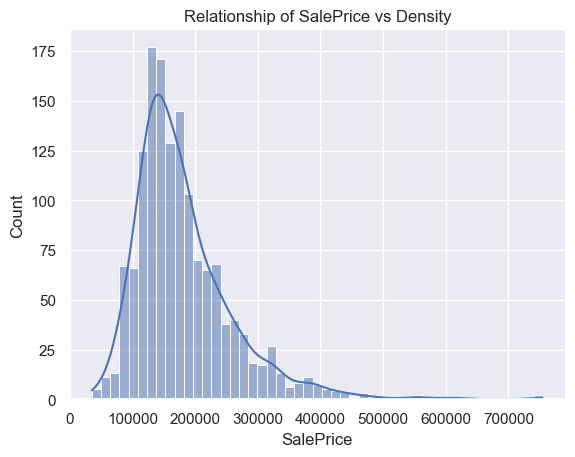

In [59]:
sns.histplot(df['SalePrice'], kde=True)

plt.title("Relationship of SalePrice vs Density")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.show()

**⭐ OBSERVATIONS**

* SalePrice feature has Right skewness distribution.
* The maximum frequency lies in the range near the 1.75 lakh, or in other words, the most houses are priced near to 1.75 lakh

#### 1.2 Descriptive Statistics

In [29]:
mean_price = df['SalePrice'].mean()
median_price = df['SalePrice'].median()
std_dev = df['SalePrice'].std()
percentiles = df['SalePrice'].quantile([0.25, 0.75])

print(f"Mean Price: {mean_price}")
print(f"Median Price: {median_price}")
print(f"Standard Deviation: {std_dev}")
print(f"25th Percentile: {percentiles[0.25]}")
print(f"75th Percentile: {percentiles[0.75]}")

Mean Price: 180921.19589041095
Median Price: 163000.0
Standard Deviation: 79442.50288288663
25th Percentile: 129975.0
75th Percentile: 214000.0


#### 1.3 Box Plot

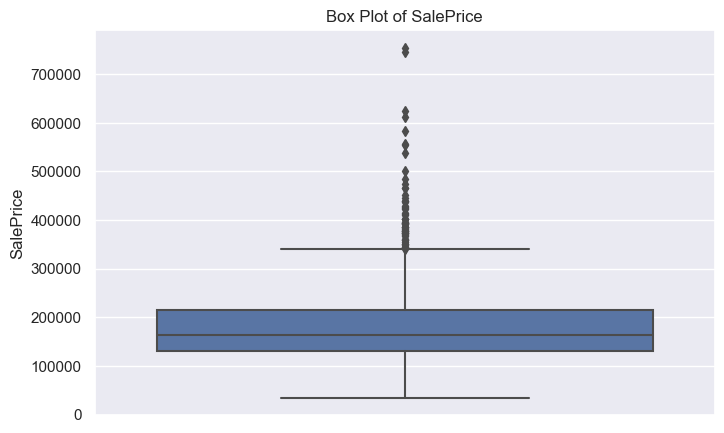

In [27]:
plt.figure(figsize=(8, 5))
sns.boxplot(y='SalePrice', data=df)
plt.title("Box Plot of SalePrice")
plt.show()

#### 1.4 Outlier Analysis

In [28]:
q1 = df['SalePrice'].quantile(0.25)
q3 = df['SalePrice'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df[(df['SalePrice'] < lower_bound) | (df['SalePrice'] > upper_bound)]
print(f"Number of Outliers: {len(outliers)}")


Number of Outliers: 61


**⭐ OBSERVATIONS**

* There are 61 ouliers. 
* Houses with sale prices that fall below approximately 40k and above approximately 340k comes under potential outliers. These prices are more than 1.5 times the interquartile range (IQR) above or below the upper and lower quartiles.

#### 1.5 Pairplot 

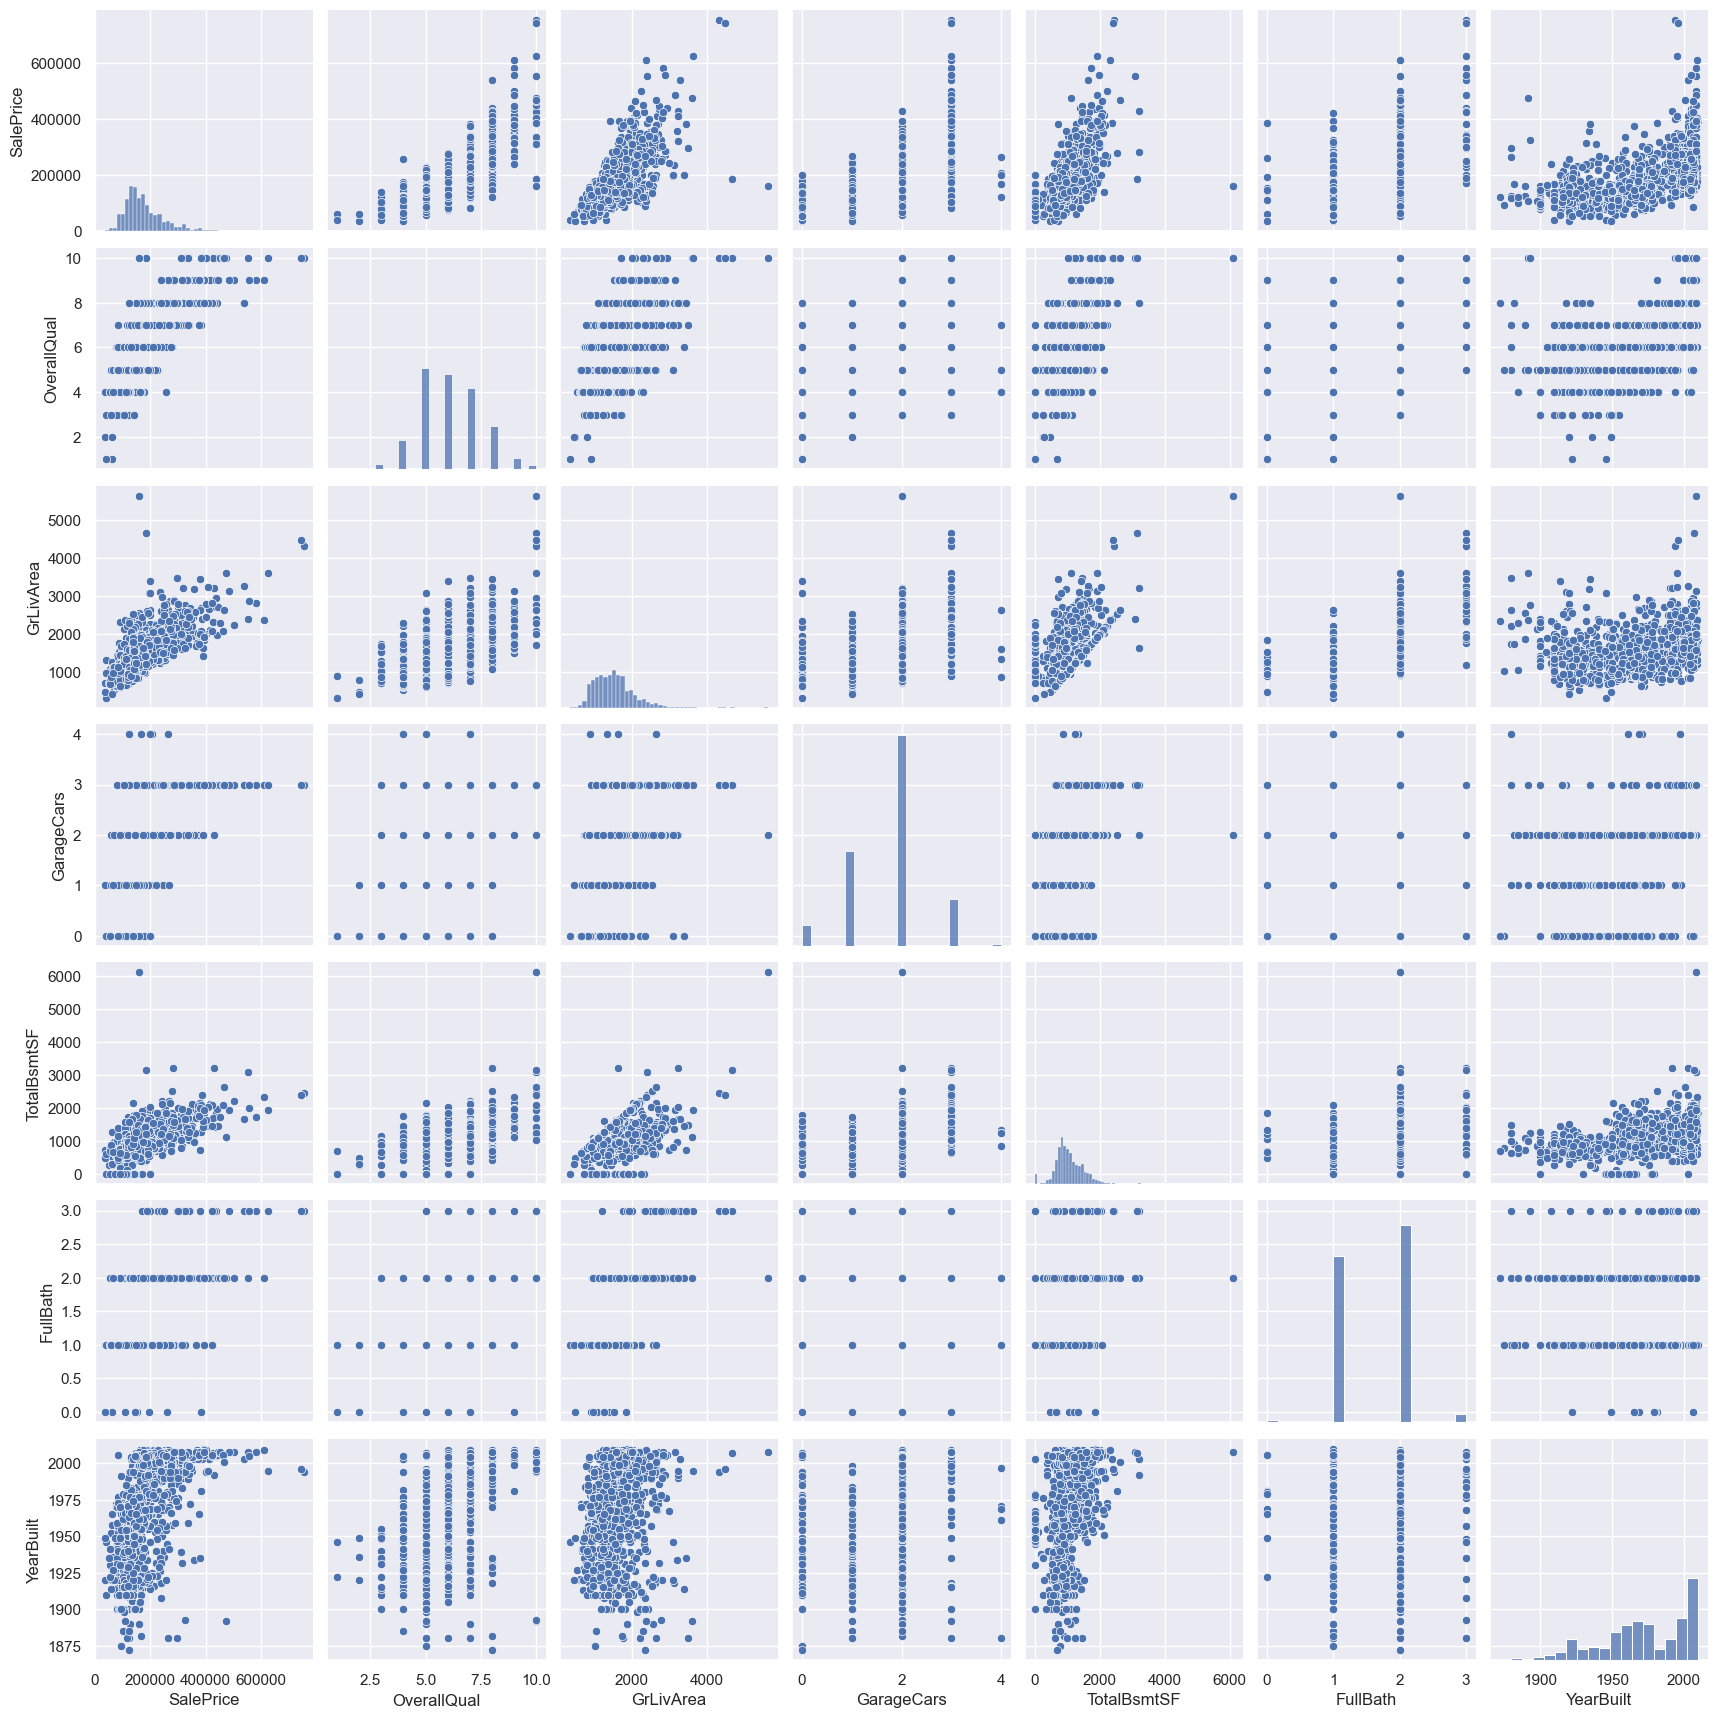

In [24]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', 'YearBuilt', 'FullBath']
sns.pairplot(df[cols])
plt.show()

**⭐ OBSERVATIONS**

* TotalBsmtSF and GrLivArea, seems to have linear relationship with SalePrice.
* Year built seems to have somewhat like an exponential relationship with SalePrice.

**Let's start our hypothesis with features keeping the above observations in consideration.**

### 2. Hypothesis Testing related to house prices

#### 2.1 Houses with a higher overall quality (OverallQual) will have higher sale prices.

To investigate whether houses with a higher overall quality rating, as indicated by the 'OverallQual' feature, tend to have higher sale prices.

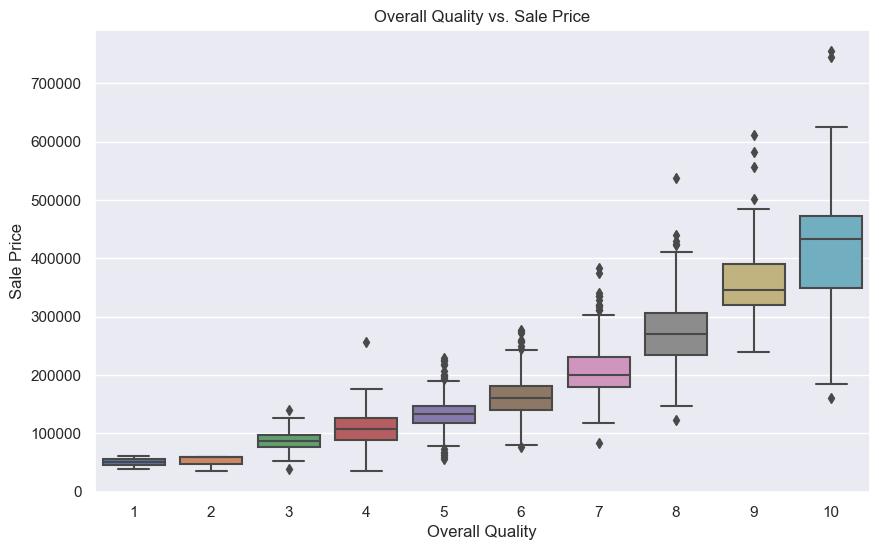

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['OverallQual'], y=data['SalePrice'])
plt.title("Overall Quality vs. Sale Price")
plt.xlabel("Overall Quality")
plt.ylabel("Sale Price")
plt.show()

**⭐ OBSERVATIONS**

* Trend - As OverallQual increases, the median SalePrice also increases

To explore the relationship more, Let's do Regression plot

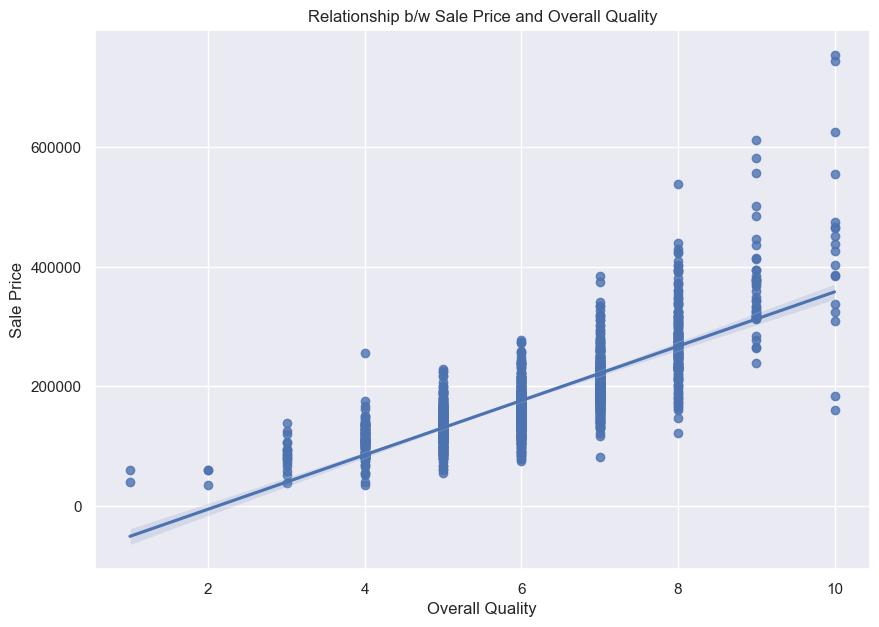

In [34]:
plt.figure(figsize=(10, 7))
sns.regplot(x=df['OverallQual'],y=df['SalePrice'], fit_reg=True)
plt.title('Relationship b/w Sale Price and Overall Quality')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.show()

**⭐ OBSERVATIONS**

* Positive relationship between OverallQual and SalePrice

Let's calculate the Pearson correlation coefficient(PCC) which will indicate the strength and direction of the linear relationship between OverallQual and SalePrice.

In [51]:
corr1 = df['OverallQual'].corr(df['SalePrice'])
corr1

0.7909816005838046

**⭐ CONCLUSION**

* With positive correlation of 0.79, there appears to be significant positive relationship between the overall quality of houses and their sale prices

#### 2.2 The size of the living area (GrLivArea) positively correlates with higher sale prices.

To investigate whether the size of the above ground living area, represented by 'GrLivArea', is positively correlated with higher sale prices.

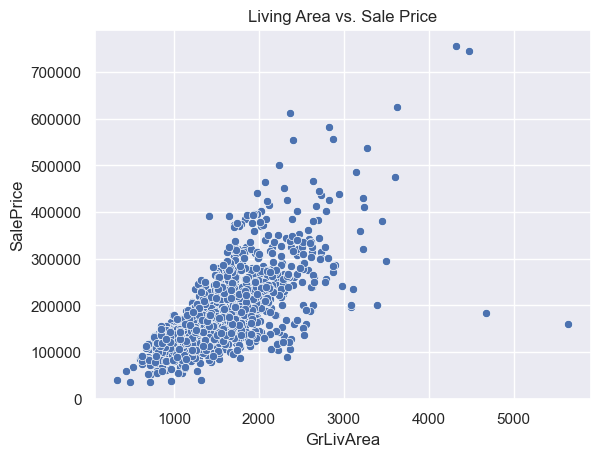

In [52]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.title("Living Area vs. Sale Price")
plt.show()

**⭐ OBSERVATIONS**

* Positive linear relationship between GrLivArea and SalePrice, where larger living areas tend to be associated with higher sale prices.
* Presence of outliers.

Let's calculate the Pearson correlation coefficient(PCC) which will indicate the strength and direction of the linear relationship between GrLivArea and SalePrice.

In [53]:
corr2 = df['GrLivArea'].corr(df['SalePrice'])
corr2

0.7086244776126518

**⭐ CONCLUSION**

* With positive correlation of 0.70, there appears to be strong positive correlation between the size of the living area (GrLivArea) and sale prices, indicating that larger living areas are associated with higher sale prices.

#### 2.3 A larger basement area (TotalBsmtSF) will lead to higher house prices.

To investigate whether a larger basement area, represented by 'TotalBsmtSF', leads to higher house prices.

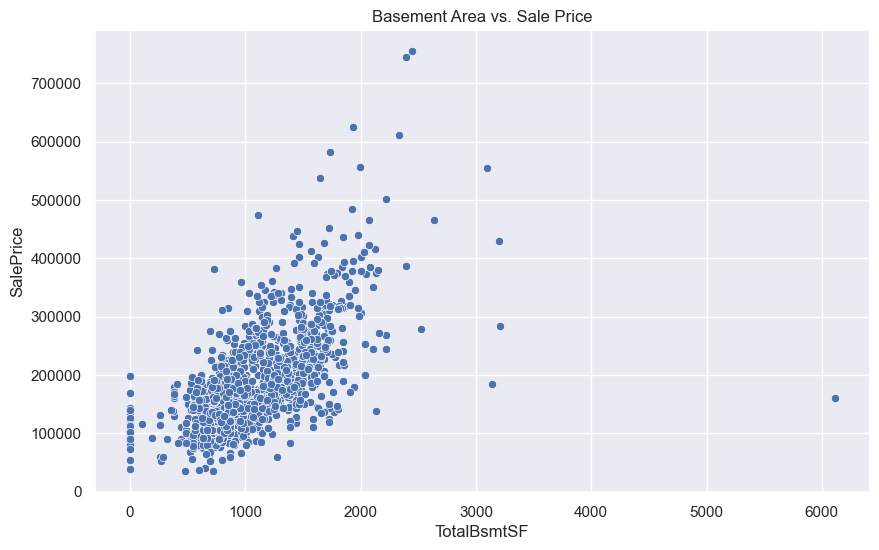

In [55]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=df)
plt.title("Basement Area vs. Sale Price")
plt.show()

**⭐ OBSERVATIONS**

* Trend - Larger basement areas tend to have higher SalePrices, suggesting a positive relationship.

To explore the relationship, Let's do Regression plot

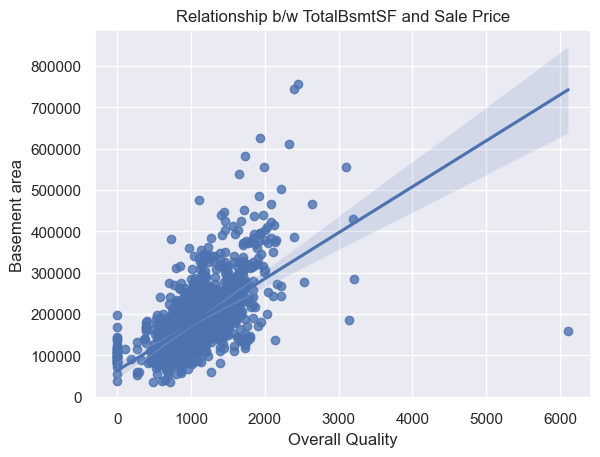

In [62]:
sns.regplot(x=df['TotalBsmtSF'],y=df['SalePrice'], fit_reg=True)
plt.title('Relationship b/w TotalBsmtSF and Sale Price')
plt.xlabel('Overall Quality')
plt.ylabel('Basement area')
plt.show()

**⭐ OBSERVATIONS**

* Positive linear relationship between TotalBsmtSF and SalePrice

Let's calculate the Pearson correlation coefficient(PCC) which will indicate the strength and direction of the linear relationship between TotalBsmtSF and SalePrice.

In [56]:
corr3 = df['TotalBsmtSF'].corr(df['SalePrice'])
corr3

0.6135805515591953

**⭐ CONCLUSION**

* With positive correlation of 0.61, there appears to be positive relationship between the size of the basement area (TotalBsmtSF) and house prices. Larger basement areas are associated with higher sale prices.

#### 2.4 Houses with a larger garage capacity (GarageCars) will have higher sale prices.

To investigate whether houses with a larger garage capacity, as indicated by 'GarageCars', have higher sale prices.

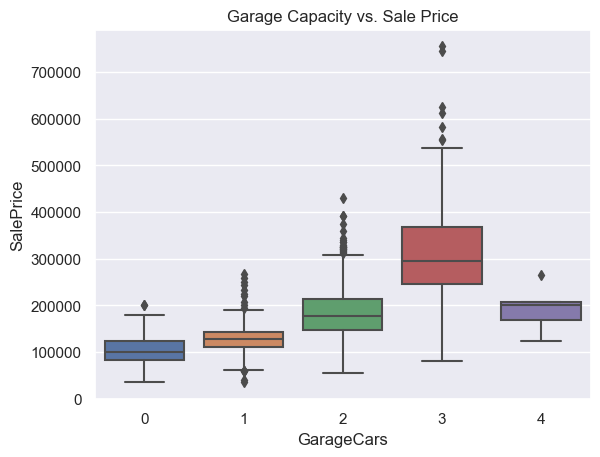

In [64]:
sns.boxplot(x='GarageCars', y='SalePrice', data=df)
plt.title("Garage Capacity vs. Sale Price")
plt.show()

**⭐ OBSERVATIONS**

* Houses with more garage capacity generally have higher median SalePrices.

Let's calculate the Pearson correlation coefficient(PCC) which will indicate the strength and direction of the linear relationship between GarageCars and SalePrice.

In [66]:
corr4 = df['GarageCars'].corr(df['SalePrice'])
corr4

0.6404091972583529

**⭐ CONCLUSION**

* With positive correlation of 0.64, there is a significant positive association between the capacity of the garage (GarageCars) and sale prices. As garage capacity increases, median sale prices tend to be higher.

#### 2.5 Newer houses tend to have higher sale prices compared to older houses.

To investigate whether newer houses, represented by the 'YearBuilt' feature, tend to have higher sale prices compared to older houses.

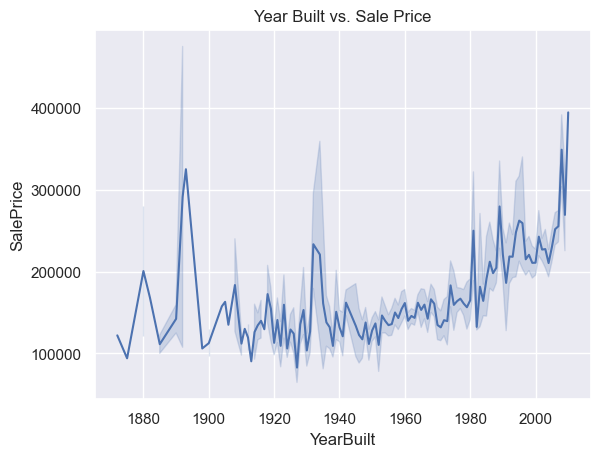

In [69]:
sns.lineplot(x='YearBuilt', y='SalePrice', data=df)
plt.title("Year Built vs. Sale Price")
plt.show()

**⭐ OBSERVATIONS**

* Idea about the trend of SalePrice over time, providing insights into how newer and older house prices compare.
* Possibility of having positive linear relationship.

Let's calculate the Pearson correlation coefficient(PCC) which will indicate the strength and direction of the linear relationship between YearBuilt and SalePrice.

In [70]:
corr5 = df['YearBuilt'].corr(df['SalePrice'])
corr5

0.5228973328794967

**⭐ CONCLUSION**
* Relationship - Positive correlation.
* Strength of the Relationship - It indicates a moderate correlation
* The correlation is not so strong that we can make precise predictions, but it provides valuable information about the relationship between the two variables.

In [ ]:
The Neighborhood and House Type Are Dependent Variables.

#### 2.6 Neighborhoods Have Different Median Sale Prices

To determine if the choice of neighborhood significantly affects the median sale price, without relying on ANOVA or Pearson Correlation Coefficient.

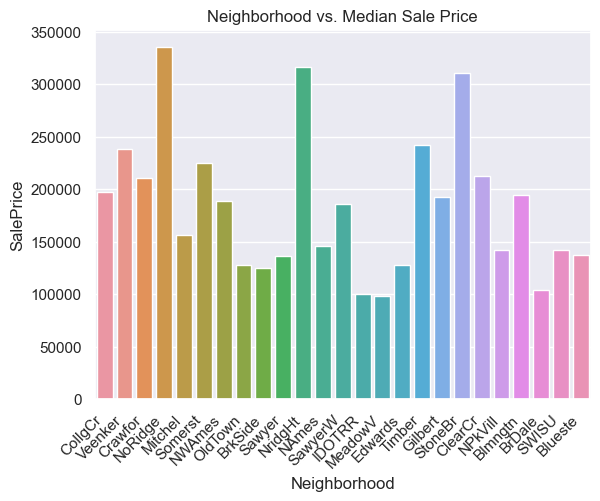

In [76]:
sns.barplot(x='Neighborhood', y='SalePrice', data=df, errorbar=None)
plt.title("Neighborhood vs. Median Sale Price")
plt.xticks(rotation=45, ha='right')  # Rotate neighborhood labels for readability
plt.show()

**⭐ OBSERVATIONS**

* The grouped bar plot provides a visual comparison of the median sale prices among different neighborhoods.
* Neighborhoods with higher median sale prices will be more apparent in the plot.

**⭐ CONCLUSION**

* The grouped bar plot helps us observe and compare the median sale prices for various neighborhoods. Based on the visualization, we can conclude that the choice of neighborhood seems to significantly affect the median sale price.